<a href="https://colab.research.google.com/github/AsheryMbilinyi/hackzurich/blob/master/Vontobel_Predict_sustainability_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and data loading

In [0]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns

In [0]:
cnx = sql.connect('hack_train.db')
company = pd.read_sql_query("SELECT * FROM company", cnx)
news = pd.read_sql_query("SELECT * FROM news", cnx)
rated = pd.read_sql_query("SELECT * FROM rated", cnx)

In [0]:
company.head()

,id,rated,news
0,1,3M Co,3M
1,2,3i Group PLC,3i Group
2,3,58.com Inc.,58.com Inc (ADR)
3,4,A. O. Smith Corporation,IHI Corporation
4,5,A.P. Møller - Mærsk A/S,AP Moeller - Maersk


# Create categorized news - theme+category

In [0]:
categorized_news = news.groupby(['company', 'theme', 'answer_category']).size().reset_index()
categorized_news['theme_category'] = categorized_news[['theme', 'answer_category']].apply(lambda x: '_'.join(x), axis=1)
categorized_news.drop(['answer_category', 'theme'], axis = 1, inplace=True)
categorized_news = categorized_news.pivot(index='company', columns='theme_category', values=0)
categorized_news.head()

theme_category,Environment_Category 0,Environment_Category 1,Environment_Category 2,Environment_Category 3,Environment_Category 4,Environment_Category 5,Governance_Category 0,Governance_Category 1,Governance_Category 2,Governance_Category 3,Governance_Category 4,Governance_Category 5,Social_Category 0,Social_Category 1,Social_Category 2,Social_Category 3,Social_Category 4,Social_Category 5
company,,,,,,,,,,,,,,,,,,
3M Co,NaN,NaN,10.0,16.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,3.0,7.0,NaN,NaN
3i Group PLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
58.com Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
A. O. Smith Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN
A.P. Møller - Mærsk A/S,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,8.0,NaN,NaN,NaN


In [0]:
categorized_news.fillna(0, inplace=True)
categorized_news.reset_index(inplace=True)
categorized_news.head()

theme_category,company,Environment_Category 0,Environment_Category 1,Environment_Category 2,Environment_Category 3,Environment_Category 4,Environment_Category 5,Governance_Category 0,Governance_Category 1,Governance_Category 2,Governance_Category 3,Governance_Category 4,Governance_Category 5,Social_Category 0,Social_Category 1,Social_Category 2,Social_Category 3,Social_Category 4,Social_Category 5
0,3M Co,0.0,0.0,10.0,16.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,7.0,0.0,0.0
1,3i Group PLC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,58.com Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,A. O. Smith Corporation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
4,A.P. Møller - Mærsk A/S,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,8.0,0.0,0.0,0.0


In [0]:
categorized_news.shape

(1417, 19)

# Merge categorized news with rated

In [0]:
ratings = rated[['sustainability_score', 'company']]
ratings.dropna(subset=['sustainability_score'], inplace=True)

C:\Users\Ayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
ratings = ratings.groupby(['company']).mean().reset_index()
ratings['company'].unique()

array(['3M', '3SBio Inc', '3i Group', ..., 'mBank SA',
       'salesforce.com, inc.', 'voestalpine AG'], dtype=object)

In [0]:
company['rated'].unique()

array(['3M Co', '3i Group PLC', '58.com Inc.', ..., 'mBank S.A.',
       'thyssenkrupp AG', 'voestalpine AG'], dtype=object)

In [0]:
ratings_new = pd.merge(ratings, company, left_on='company', right_on='news', how='inner')

In [0]:
ratings_new.head()

,company,sustainability_score,id,rated,news
0,3M,62.801852,1,3M Co,3M
1,3i Group,79.667396,2,3i Group PLC,3i Group
2,58.com Inc (ADR),8.934284,3,58.com Inc.,58.com Inc (ADR)
3,ABB,57.961890,9,ABB Ltd,ABB
4,"ABC-MART, INC.",1.302219,432,E-MART Inc,"ABC-MART, INC."


In [0]:
ratings_new[['rated', 'sustainability_score']].head()

,rated,sustainability_score
0,3M Co,62.801852
1,3i Group PLC,79.667396
2,58.com Inc.,8.934284
3,ABB Ltd,57.961890
4,E-MART Inc,1.302219


In [0]:
df = pd.merge(ratings_new[['rated', 'sustainability_score']], categorized_news, left_on='rated', right_on='company', how='inner')

In [0]:
df.isna().sum()

rated                     0
sustainability_score      0
company                   0
Environment_Category 0    0
Environment_Category 1    0
Environment_Category 2    0
Environment_Category 3    0
Environment_Category 4    0
Environment_Category 5    0
Governance_Category 0     0
Governance_Category 1     0
Governance_Category 2     0
Governance_Category 3     0
Governance_Category 4     0
Governance_Category 5     0
Social_Category 0         0
Social_Category 1         0
Social_Category 2         0
Social_Category 3         0
Social_Category 4         0
Social_Category 5         0
dtype: int64

# Predictions

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor    

In [0]:
df.columns.tolist()

['rated',
 'sustainability_score',
 'company',
 'Environment_Category 0',
 'Environment_Category 1',
 'Environment_Category 2',
 'Environment_Category 3',
 'Environment_Category 4',
 'Environment_Category 5',
 'Governance_Category 0',
 'Governance_Category 1',
 'Governance_Category 2',
 'Governance_Category 3',
 'Governance_Category 4',
 'Governance_Category 5',
 'Social_Category 0',
 'Social_Category 1',
 'Social_Category 2',
 'Social_Category 3',
 'Social_Category 4',
 'Social_Category 5']

In [0]:
Y = df['sustainability_score']
X = df.loc[:,(df.columns != 'sustainability_score') & (df.columns != 'company') & (df.columns != 'rated')]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [0]:
X_train.head()

,Environment_Category 0,Environment_Category 1,Environment_Category 2,Environment_Category 3,Environment_Category 4,Environment_Category 5,Governance_Category 0,Governance_Category 1,Governance_Category 2,Governance_Category 3,Governance_Category 4,Governance_Category 5,Social_Category 0,Social_Category 1,Social_Category 2,Social_Category 3,Social_Category 4,Social_Category 5
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0,6.0,1.0,35.0,0.0,0.0
1182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1290,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0
772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
y_train.head()

435     10.215565
202     22.849632
1182     3.169353
1290     1.442325
772     17.228914
Name: sustainability_score, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (1337, 18) and (268,)

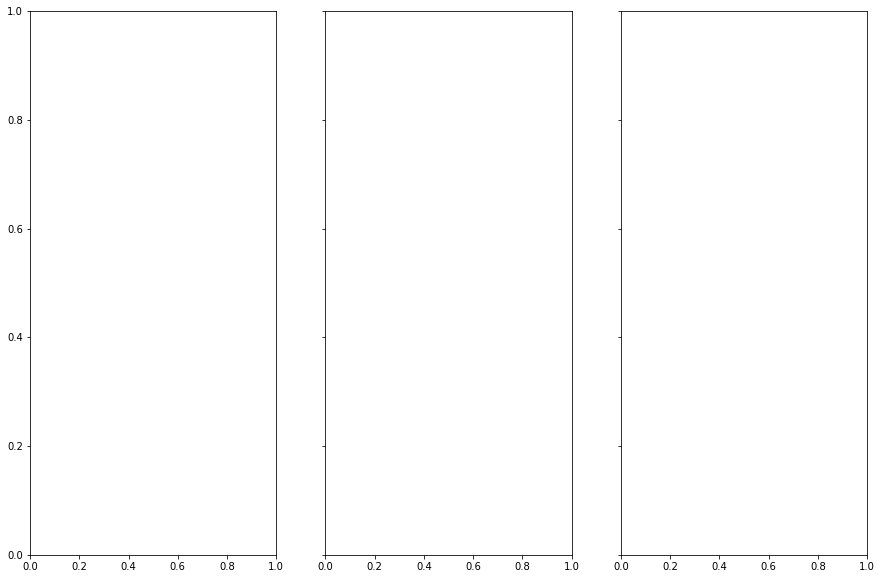

In [0]:

from sklearn.svm import SVR
import matplotlib.pyplot as plt
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)


lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X_train, y_train).predict(X_test), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X_test[svr.support_], y_test[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X_test[np.setdiff1d(np.arange(len(X_test)), svr.support_)],
                     y_test[np.setdiff1d(np.arange(len(X_test)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()